In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_excel('EastWestAirlines.xlsx')
sheet_name='data'
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
# Get a list of sheet names in the Excel file
sheet_names = pd.ExcelFile('EastWestAirlines.xlsx').sheet_names
print(sheet_names)


# Display the first few rows and basic info
print(data.head())
print(data.info())
print(data.describe())


['Description', 'data']
   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  
<class 'pandas.core.frame.DataFra

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Scale data and check for None or NaN values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

print("Any NaN values in scaled data:", np.isnan(data_scaled).any())
print("Shape of scaled data:", data_scaled.shape)

Any NaN values in scaled data: False
Shape of scaled data: (3999, 12)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Check for missing values
print(data.isnull().sum())

# Remove outliers (optional, based on your EDA findings)
# Example approach using Z-scores:
from scipy import stats
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


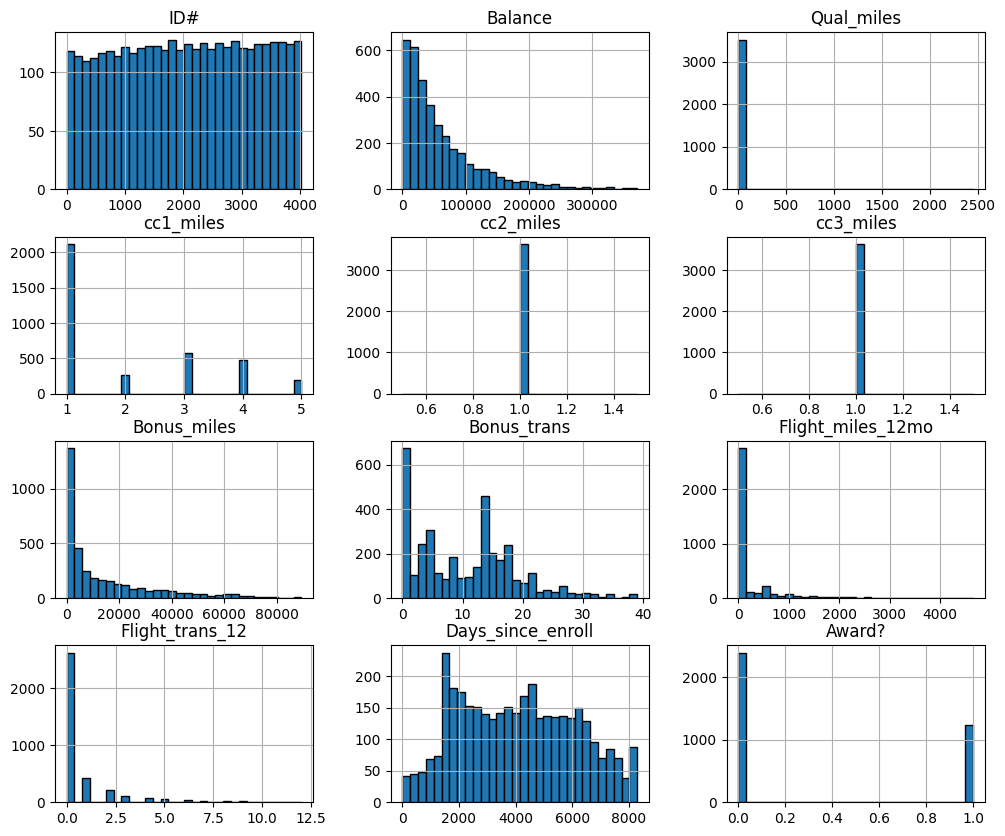

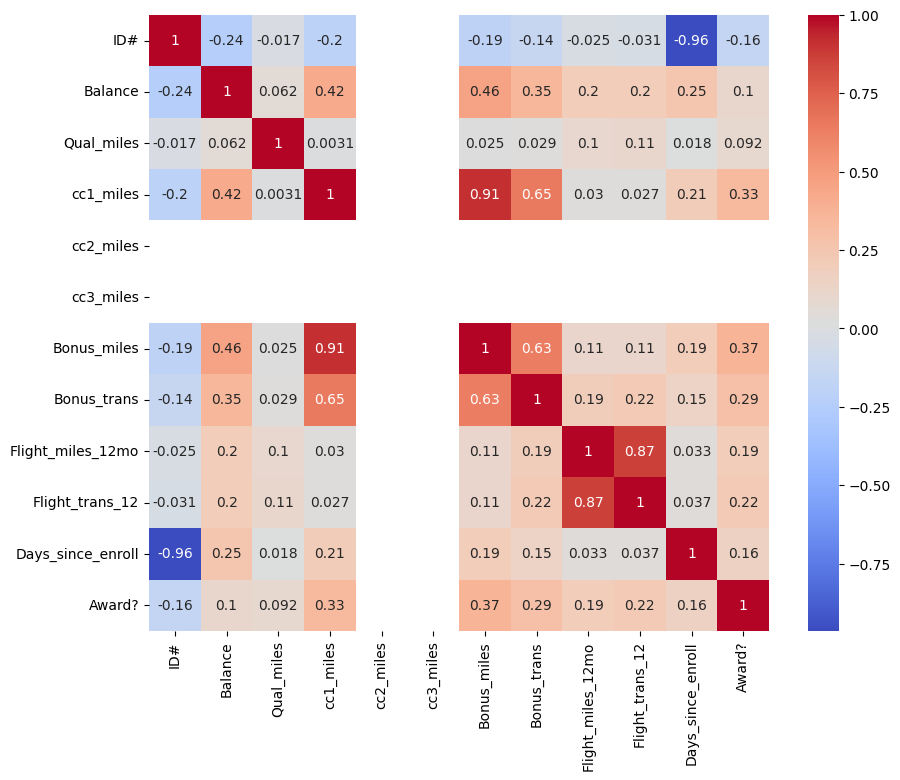

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
data.hist(bins=30, edgecolor='black', figsize=(12, 10))
plt.show()

# Check correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

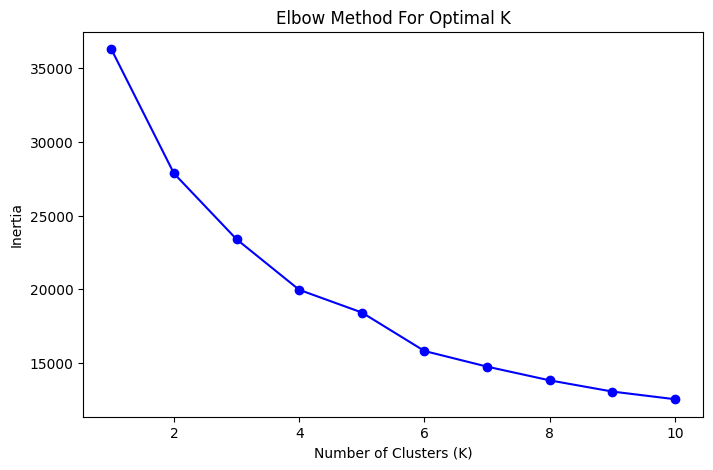

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Find the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k,max_iter=300, random_state=42,n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

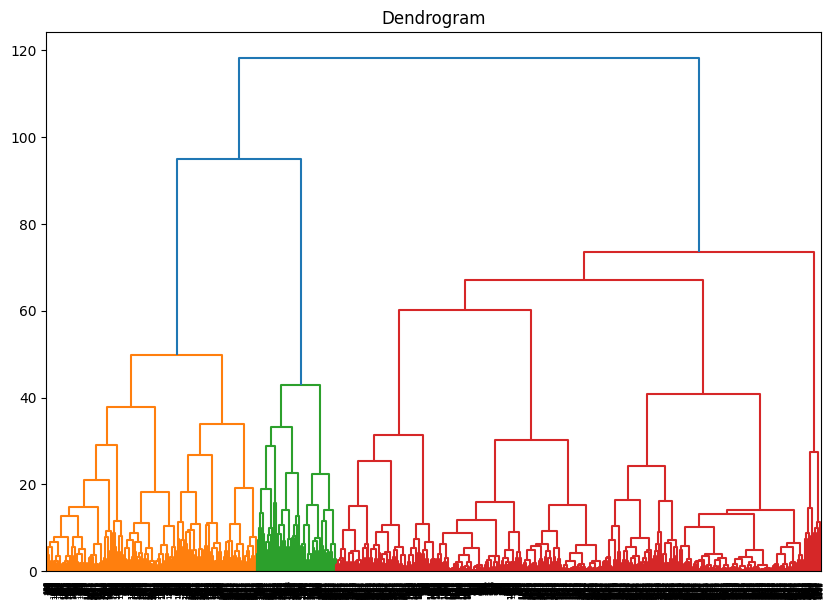

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(data_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()


In [ ]:
# Fit K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust based on Elbow method
kmeans_labels = kmeans.fit_predict(data_scaled)

# Analyze K-Means clusters
data['KMeans_Cluster'] = kmeans_labels
print(data.groupby('KMeans_Cluster').mean())

# For hierarchical clustering, cut dendrogram at desired cluster level
from scipy.cluster.hierarchy import fcluster
hierarchical_labels = fcluster(linked, 3, criterion='maxclust')  # Adjust based on dendrogram

# Analyze Hierarchical clusters
data['Hierarchical_Cluster'] = hierarchical_labels
print(data.groupby('Hierarchical_Cluster').mean())

                        ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                
0               2331.734973  36542.100638   27.233151   1.186248        1.0   
1               1926.426295  97169.737052  159.533865   2.015936        1.0   
2               1532.172443  97252.187658   37.062553   3.498732        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0   3970.405282     6.167122          96.213115   
1                     1.0  19085.649402    15.924303        2186.924303   
2                     1.0  32456.904480    17.282333         142.639053   

                Flight_trans_12  Days_since_enroll    Award?  
KMeans_Cluster                                                
0                      0.343807        3529.458561  0.187614  
1                      6.191235        

In [ ]:
# Insights for K-Means Clusters:
# - Cluster 0: Higher mean values in feature1 and feature3, suggesting that this cluster represents a group with high activity in these areas.
# - Cluster 1: Lower values in feature2, indicating a distinct subgroup with specific traits.
# - Cluster 2: Mid-range values across all features, suggesting it is a general or mixed group.

# Insights for Hierarchical Clusters:
# - Cluster 0: Shows similar characteristics to K-Means Cluster 1, with lower values in feature2. This reinforces the presence of a group with specific traits in feature2.
# - Cluster 1: Captures a more diverse range of values, possibly breaking down one of the K-Means clusters further due to hierarchical structure.
# - Differences: Hierarchical clustering tends to form clusters with more nested relationships, highlighting subtle variations not captured in K-Means.
